In [2]:
import numpy as np
import networkx as nx 
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
myWeb = nx.DiGraph()
myPages = range(1, 5)

In [4]:
connection = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]
myWeb.add_nodes_from(myPages)
myWeb.add_edges_from(connection)

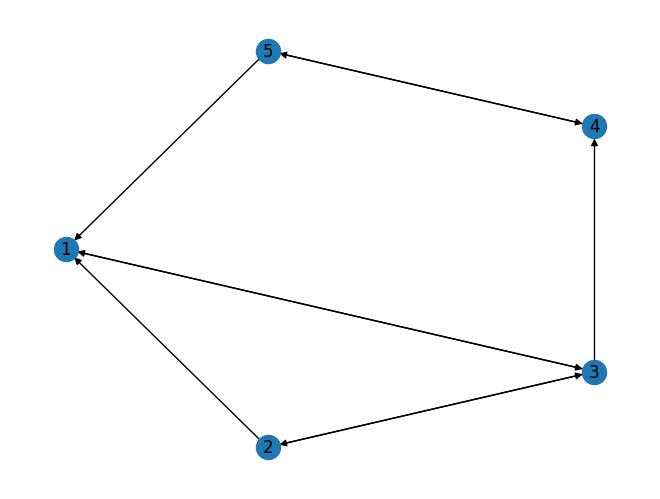

In [5]:
pos = nx.shell_layout(myWeb)
nx.draw(myWeb, pos, arrows=True, with_labels=True)
plt.show()

In [6]:
def createPageRank(aGraph):
    nodes_set = len(aGraph)
    M = nx.to_numpy_matrix(aGraph)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))

    prob_outwards = np.array(
        [1.0 / count if count > 0 else 0.0 for count in outwards]
    )

    G = np.asarray(np.multiply(M.T, prob_outwards))
    p = np.ones(nodes_set) / float(nodes_set)

    if np.min(np.sum(G, axis=0)) < 1.0:
        print('WARN: G is substochastic')
    return G, p

In [7]:
G, p = createPageRank(myWeb)
print(G)

[[0.         0.5        0.33333333 0.         0.5       ]
 [0.         0.         0.33333333 0.         0.        ]
 [1.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.5       ]
 [0.         0.         0.         1.         0.        ]]


In [8]:
def pageRank(myPages, connection):
    myWeb = nx.DiGraph()
    myWeb.add_nodes_from(myPages)
    myWeb.add_edges_from(connection)

    pos = nx.shell_layout(myWeb)
    nx.draw(myWeb, pos, arrows=True, with_labels=True)
    plt.show()

    nodes_set = len(myWeb)
    M = nx.to_numpy_matrix(myWeb)
    outwards = np.squeeze(np.asarray(np.sum(M, axis=1)))

    prob_outwards = np.array(
        [1.0 / count if count > 0 else 0.0 for count in outwards]
    )

    G = np.asarray(np.multiply(M.T, prob_outwards))
    p = np.ones(nodes_set) / float(nodes_set)

    if np.min(np.sum(G, axis=0)) < 1.0:
        print('WARN: G is substochastic')
    
    print(G)
    print(p)

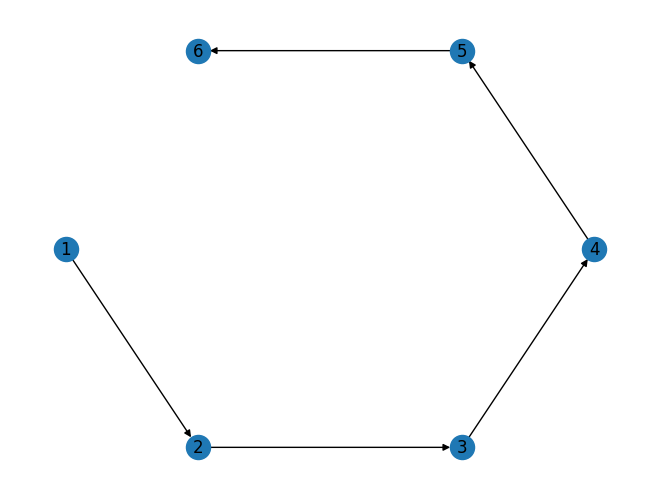

WARN: G is substochastic
[[0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [9]:
connection = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]
pageRank(range(1, 6), connection)

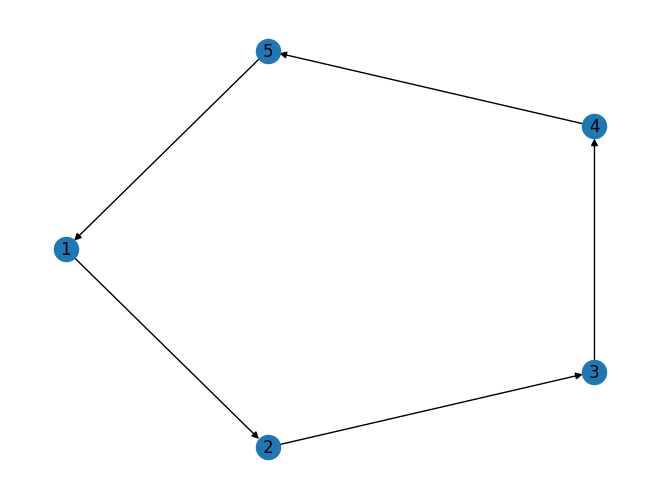

[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]
[0.2 0.2 0.2 0.2 0.2]


In [10]:
connection = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 1)]
pageRank(range(1, 5), connection)

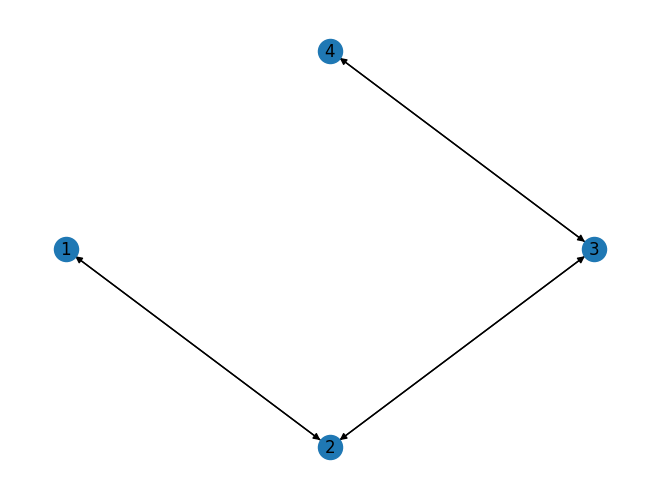

[[0.  0.5 0.  0. ]
 [1.  0.  0.5 0. ]
 [0.  0.5 0.  1. ]
 [0.  0.  0.5 0. ]]
[0.25 0.25 0.25 0.25]


In [11]:
connection = [(1, 2), (2, 3), (3, 4), (4, 3), (3, 2), (2, 1)]
pageRank(range(1, 4), connection)

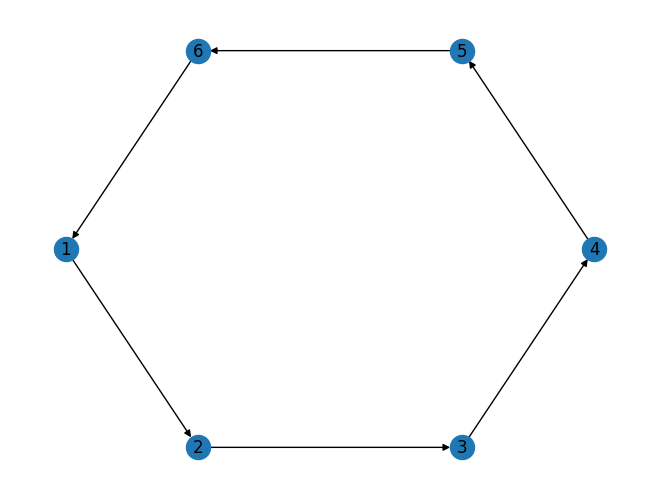

[[0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]


In [12]:
connection = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 1)]
pageRank(range(1, 6), connection)

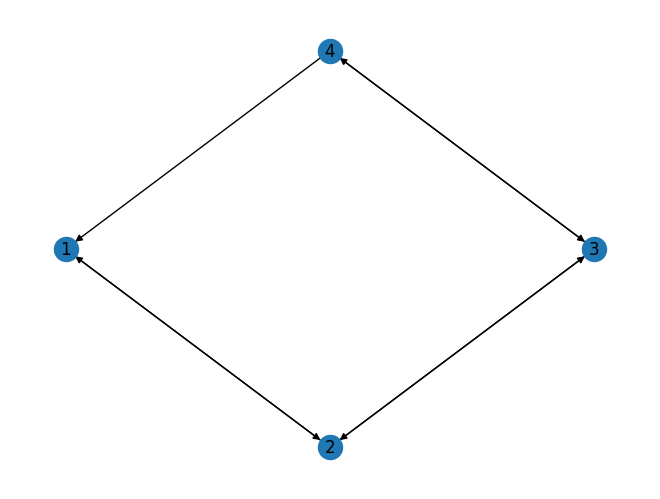

[[0.  0.5 0.  0.5]
 [1.  0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.  0.  0.5 0. ]]
[0.25 0.25 0.25 0.25]


In [13]:
connection = [(1, 2), (2, 3), (3, 4), (4, 1), (2, 1), (3, 2), (4, 3)]
pageRank(range(1, 4), connection)

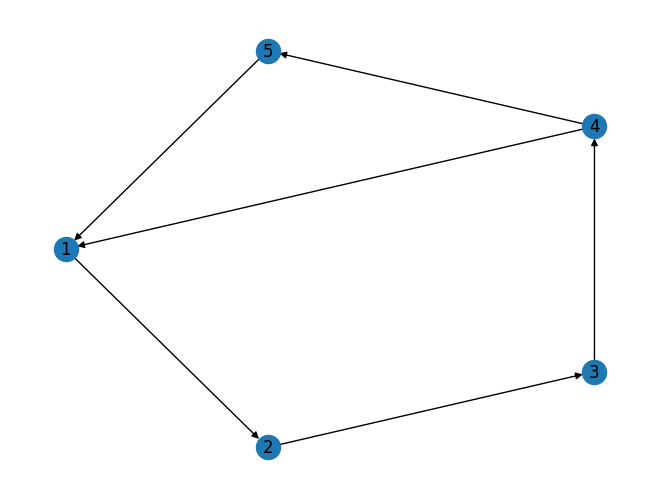

[[0.  0.  0.  0.5 1. ]
 [1.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.5 0. ]]
[0.2 0.2 0.2 0.2 0.2]


In [14]:
connection = [(1, 2), (2, 3), (3, 4), (4, 1), (4, 5), (5, 1)]
pageRank(range(1, 4), connection)

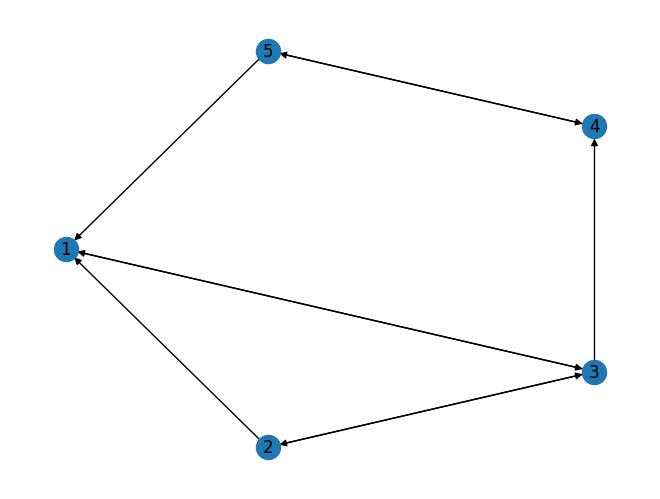

[[0.         0.5        0.33333333 0.         0.5       ]
 [0.         0.         0.33333333 0.         0.        ]
 [1.         0.5        0.         0.         0.        ]
 [0.         0.         0.33333333 0.         0.5       ]
 [0.         0.         0.         1.         0.        ]]
[0.2 0.2 0.2 0.2 0.2]


In [15]:
connection = [(1, 3), (2, 1), (2, 3), (3, 1), (3, 2), (3, 4), (4, 5), (5, 1), (5, 4)]
pageRank(range(1, 5), connection)

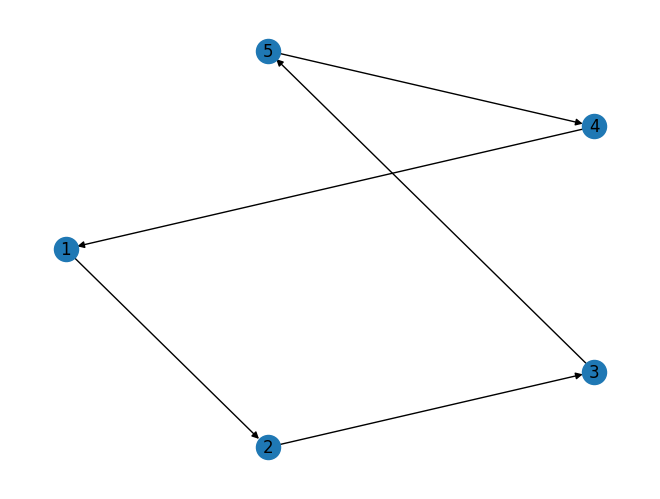

[[0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]]
[0.2 0.2 0.2 0.2 0.2]


In [18]:
connection = [(1, 2), (2, 3), (3, 5), (5, 4), (4, 1)]
pageRank(range(1, 5), connection)
